<a href="https://colab.research.google.com/github/MaximL98/MachineLearningLabs/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


tic_tac_toe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Mining LABS/tic-tac-toe.csv")

tic_tac_toe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [ ]:
X = tic_tac_toe.drop(['class'], axis = 1).to_numpy()
y = tic_tac_toe['class'].to_numpy()

In [ ]:
# x=1, b=0, o=-1
X_to_number = np.copy(X)
for i in range(len(X)):
  for j in range(len(X[0])):
    if X[i][j] == 'x':
      X_to_number[i][j] = 1
    elif X[i][j] == 'b':
      X_to_number[i][j] = 0
    else:
      X_to_number[i][j] = -1

print(X)
print()
print(X_to_number)

[['x' 'x' 'x' ... 'x' 'o' 'o']
 ['x' 'x' 'x' ... 'o' 'x' 'o']
 ['x' 'x' 'x' ... 'o' 'o' 'x']
 ...
 ['o' 'x' 'o' ... 'x' 'o' 'x']
 ['o' 'x' 'o' ... 'x' 'o' 'x']
 ['o' 'o' 'x' ... 'o' 'x' 'x']]

[[1 1 1 ... 1 -1 -1]
 [1 1 1 ... -1 1 -1]
 [1 1 1 ... -1 -1 1]
 ...
 [-1 1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 -1 1]
 [-1 -1 1 ... -1 1 1]]


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_to_number, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.983 (0.010)


>1 mean=0.9833 se=0.005
>2 mean=0.9833 se=0.003
>3 mean=0.9833 se=0.002
>4 mean=0.9833 se=0.002
>5 mean=0.9833 se=0.002
>6 mean=0.9833 se=0.001
>7 mean=0.9833 se=0.001
>8 mean=0.9833 se=0.001
>9 mean=0.9833 se=0.001
>10 mean=0.9833 se=0.001
>11 mean=0.9833 se=0.001
>12 mean=0.9833 se=0.001
>13 mean=0.9833 se=0.001
>14 mean=0.9833 se=0.001
>15 mean=0.9833 se=0.001


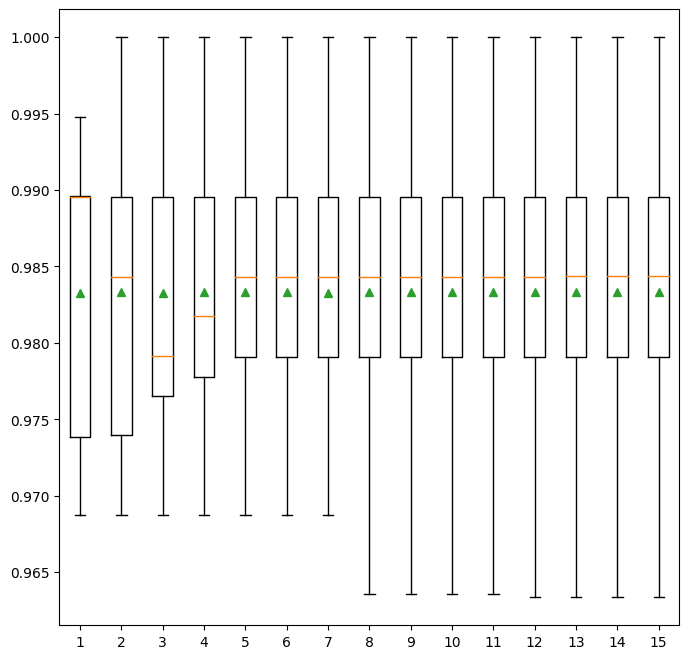

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X_to_number, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

  # configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [ ]:
from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X_to_number)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 766
Number of validation indices: 192
Number of training indices: 766
Number of validation indices: 192
Number of training indices: 766
Number of validation indices: 192
Number of training indices: 767
Number of validation indices: 191
Number of training indices: 767
Number of validation indices: 191


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X_to_number[train_index], y[train_index]
    X_val, y_val = X_to_number[val_index], y[val_index]

    # Fit the random forest model
    rfc.fit(X_train, y_train)

    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Setup cross_val_score
cv = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10, scoring=mse)

# Print the mean error
print("The MSE is:", cv.mean())

The MSE is: 0.018383130553656868


In [ ]:
from sklearn.metrics import mean_absolute_error
# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X_to_number, y, cv=958, scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))


The mean of the errors is: 0.05601948503827417.
The standard deviation of the errors is: 0.11159967388043578.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import itertools

X_train, X_test, y_train, y_test = train_test_split(X_to_number, y, test_size=192, random_state=42, stratify=y)
y_train[:10]

array([ True, False,  True, False,  True,  True,  True, False,  True,
        True])

In [ ]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [ ]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [ ]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([0.97668501, 0.97664644, 0.97664507, 0.97667877, 0.97667915]),
 array([ True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True]))

In [ ]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[ 62,   5],
       [  0, 125]])

Text(0.5, 118.72222222222216, 'Predicted label')

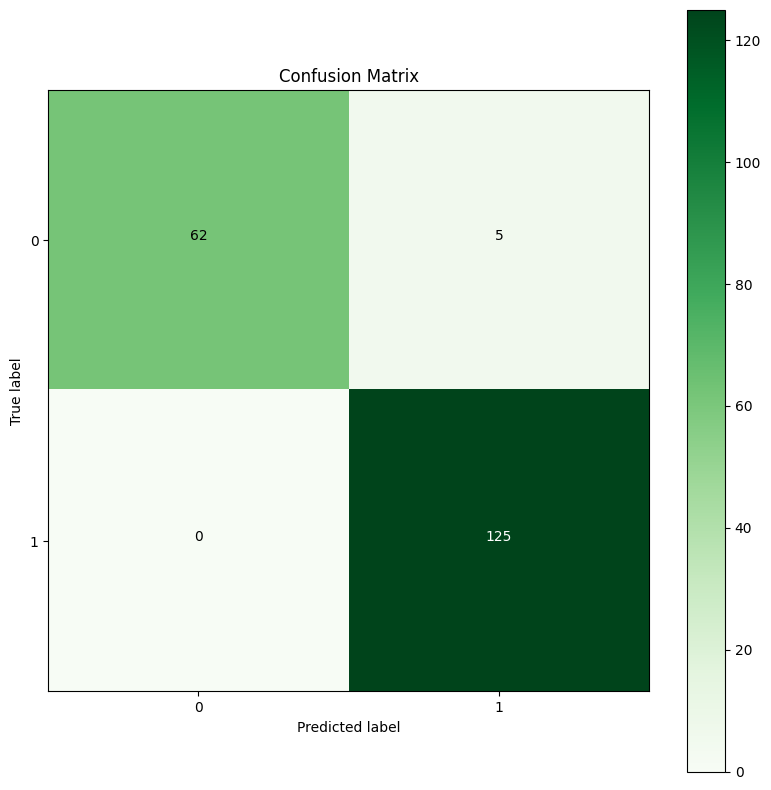

In [ ]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# from the confusion matrix
TP = true_pos = conf[1][1]
TN = true_neg = conf[0][0]
FP = false_pos = conf[0][1]
FN = false_neg = conf[1][0]

In [ ]:
results = {}
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.974


In [ ]:
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  1.000


In [ ]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.925


In [ ]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.962


In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  1.000


In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.980


In [ ]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.943


In [ ]:
print(f"Calculated and Actual Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated and Actual Accuracy:                           0.974,  0.974
Calculated and Actual Precision score:                    0.962,  0.962
Calculated and Actual Recall score:                       1.000,  1.000
Calculated and Actual F1 score:                           0.980,  0.980
Calculated and Actual Matthew's correlation coefficient:  0.943,  0.943


In [ ]:
def get_roc_curve(y_test, y_proba, delta=0.1):
    """
    Return the True Positive Rates (TPRs), False Positive Rates (FPRs),
    and the threshold values, seperated by delta.
    """
    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1

        # confusion matrix
        (TN, FP), (FN, TP) = metrics.confusion_matrix(y_test, y_pred)

        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

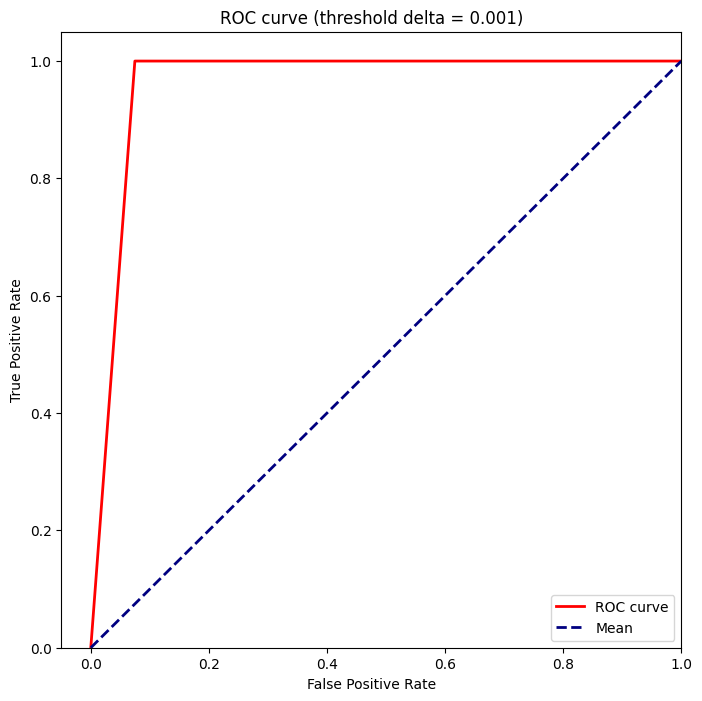

In [ ]:
delta = 0.001

FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)
# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [ ]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

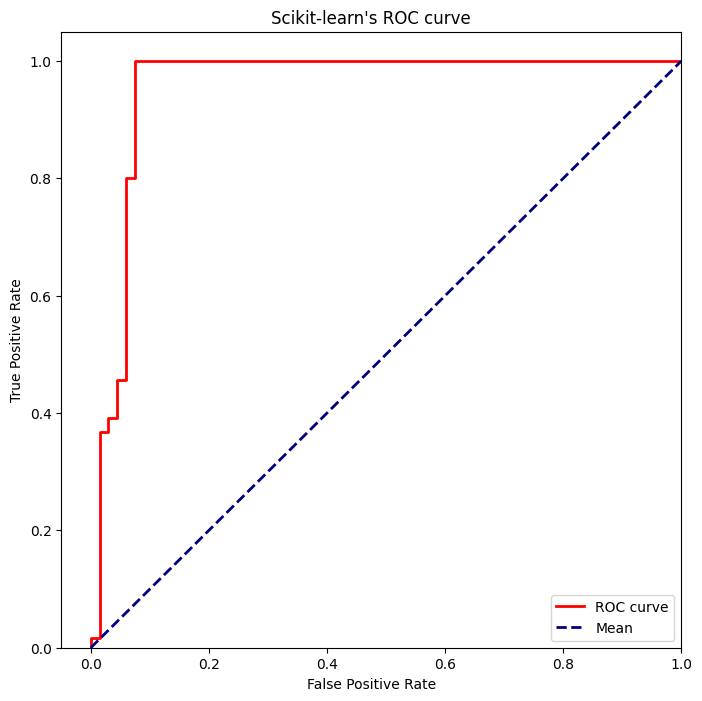

In [ ]:
# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9557


In [ ]:
def get_roc_auc_score(y_test, y_proba):

    # use the function get_roc_curve that we created.
    FPRs, TPRs, _ = get_roc_curve(y_test, y_proba)
    FPRs.reverse()
    TPRs.reverse()
    x1, y1 = FPRs[0], TPRs[0]
    auc = 0.0
    prev = 0.0
    # cumulative differences in x-axis
    diffs = [FPRs[i] - FPRs[i-1] for i in range(1, len(FPRs))]
    for x, y in zip(diffs, TPRs[1:]):
        auc += (x * y1)  # area of rectangle
        auc += (x * (y - y1)/2)  # area of triangle formed (if any)
        y1 = y
    return auc

In [ ]:
auc_score = get_roc_auc_score(y_test, y_proba)
print(f"Our ROC-AUC score of SVC model is {auc_score: .4f}")

Our ROC-AUC score of SVC model is  0.9627
